# ML Mapping


We have a bunch of hourly files produced by the methods outlined in `8.Updated_Pipeline`.




In [114]:
import glob
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/outputs/'
all_files = sorted(glob.glob(root+'*.pkl'))


These files are actually quite small. For now, lets just load them all into a single dataframe

In [115]:
import pandas as pd
dfs = []
for f in all_files:
    df = pd.read_pickle(f)
    dfs.append(df)
    
df = pd.concat(dfs).reset_index()
#and save to disk
df.to_pickle(root+'meta/test_df.pkl')

In [116]:
display(df)

,level_0,index,index_ERA,values,sp,msl,u10,v10,t2m,number,...,latitude_ERA,longitude_ERA,valid_time,index_MODIS,latitude_MODIS,longitude_MODIS,band,MODIS_LST,distance,MODIS_idx
0,0,44,44,44,101015.835938,101269.9375,-13.898163,-1.774475,251.593750,0,...,69.836018,-162.750000,2018-01-02 00:00:00,209767,69.850000,-162.750000,1,254.219345,1.554724,209767
1,1,45,45,45,100863.835938,101323.9375,-12.919647,-0.952209,251.330078,0,...,69.836018,-162.000000,2018-01-02 00:00:00,209789,69.850000,-162.016667,1,255.070007,1.680773,209789
2,2,46,46,46,100629.835938,101396.4375,-12.093475,-0.199280,251.474609,0,...,69.836018,-161.250000,2018-01-02 00:00:00,209812,69.850000,-161.250000,1,253.717499,1.554724,209812
3,3,47,47,47,100637.835938,101472.6875,-10.584686,0.352478,251.509766,0,...,69.836018,-160.500000,2018-01-02 00:00:00,209835,69.850000,-160.483333,1,249.084717,1.680773,209835
4,4,48,48,48,100684.835938,101527.1875,-9.656952,0.549744,251.644531,0,...,69.836018,-159.750000,2018-01-02 00:00:00,209857,69.850000,-159.750000,1,248.395142,1.554724,209857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63256425,3013,6174,6174,6174,99319.546875,99559.5000,2.488022,3.936249,308.765686,0,...,25.714277,69.600000,2020-08-16 09:00:00,28187,25.716667,69.583333,1,314.890656,1.690709,28187
63256426,3014,6227,6227,6227,99466.546875,99576.5000,2.661850,2.703827,308.462952,0,...,25.433247,69.600000,2020-08-16 09:00:00,24137,25.416667,69.583333,1,312.367493,2.490079,24137
63256427,3015,6328,6328,6328,99459.546875,99600.5000,4.154037,2.705780,308.449280,0,...,24.871186,68.100000,2020-08-16 09:00:00,16892,24.883333,68.083333,1,306.635986,2.156639,16892
63256428,3016,6710,6710,6710,99023.546875,99901.7500,3.710678,1.434296,300.744202,0,...,22.903974,71.400000,2020-08-16 09:00:00,5292,22.950000,71.416667,1,288.359985,5.394990,5292


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


def prepare_data(df,condition):
    
    #Subset data. Maybe you want to select by time, distance etc
    df_subset = df.query(condition)
    
    #Features and outputs
    x = df_subset[['sp','msl','u10', 'v10','t2m']]
    y = df_subset[['MODIS_LST']]

    #Create train/test data. Could also split by e.g. time
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

    
    #Make everything numpy arrays
    x_train = x_train.to_numpy()
    y_train = y_train.to_numpy().ravel() #flatten

    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy().ravel()
    
    return x_train,y_train,x_test,y_test


def example_ML_model(x_train,y_train,x_test,y_test):
    
    # Initiate model 
    rf = RandomForestRegressor(n_estimators = 10, verbose=1)

    # Train the model on training data
    rf.fit(x_train, y_train)
    
    #Predictions on test data
    y_pred = rf.predict(x_test)
    
    #How good did we do?
    training_score = rf.score(x_train, y_train)
    testing_score = rf.score(x_test, y_test) # =r2_score(y_test, y_pred)
    
    return y_pred,training_score, testing_score,rf

def plot_predictions(y_test, y_pred):
    
    plt.figure(figsize=(24,12))


    plt.scatter(y_test,y_pred)
    plt.plot(y_test, y_test,c='r')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


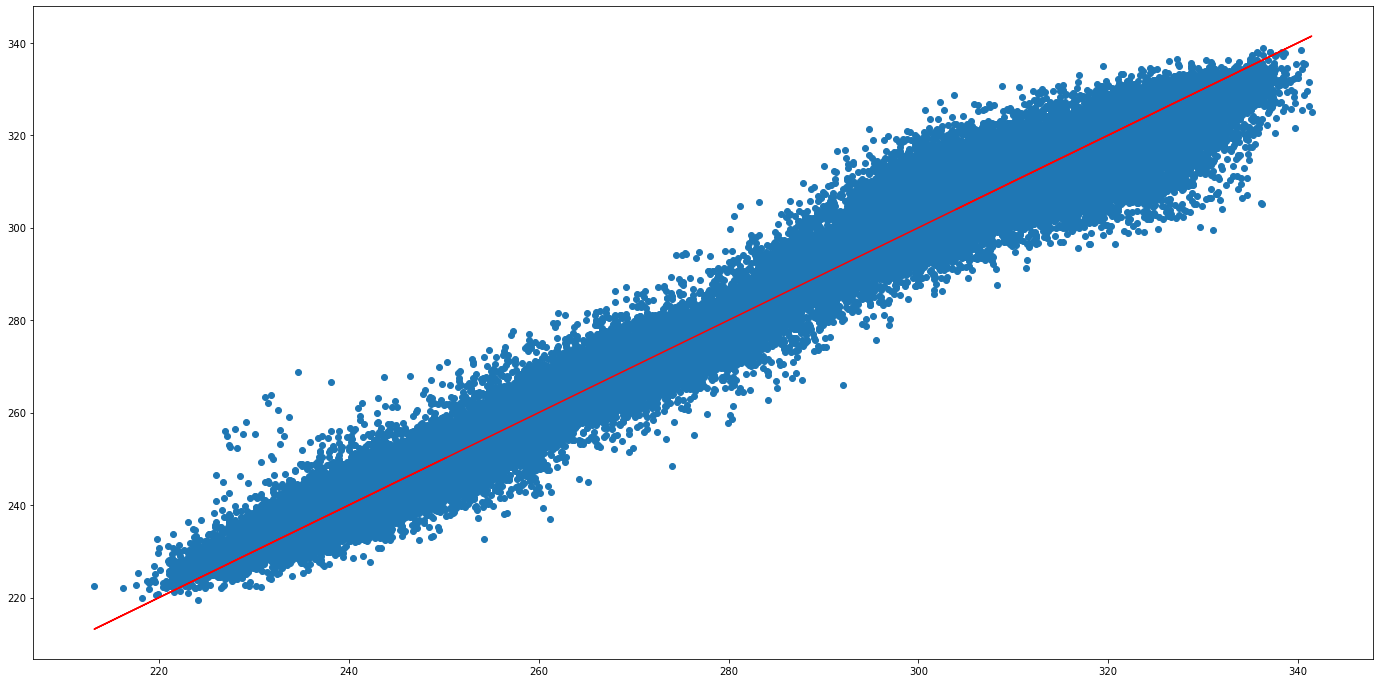

In [110]:
condition = 'distance <= 1'
x_train,y_train,x_test,y_test = prepare_data(df,condition)
y_pred,s_train, s_test,model = example_ML_model(x_train,y_train,x_test,y_test)
plot_predictions(y_test,y_pred)






In [113]:
s_train, s_test

(0.9950386841168603, 0.9721374499910082)

In [111]:
y_pred_train = model.predict(x_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


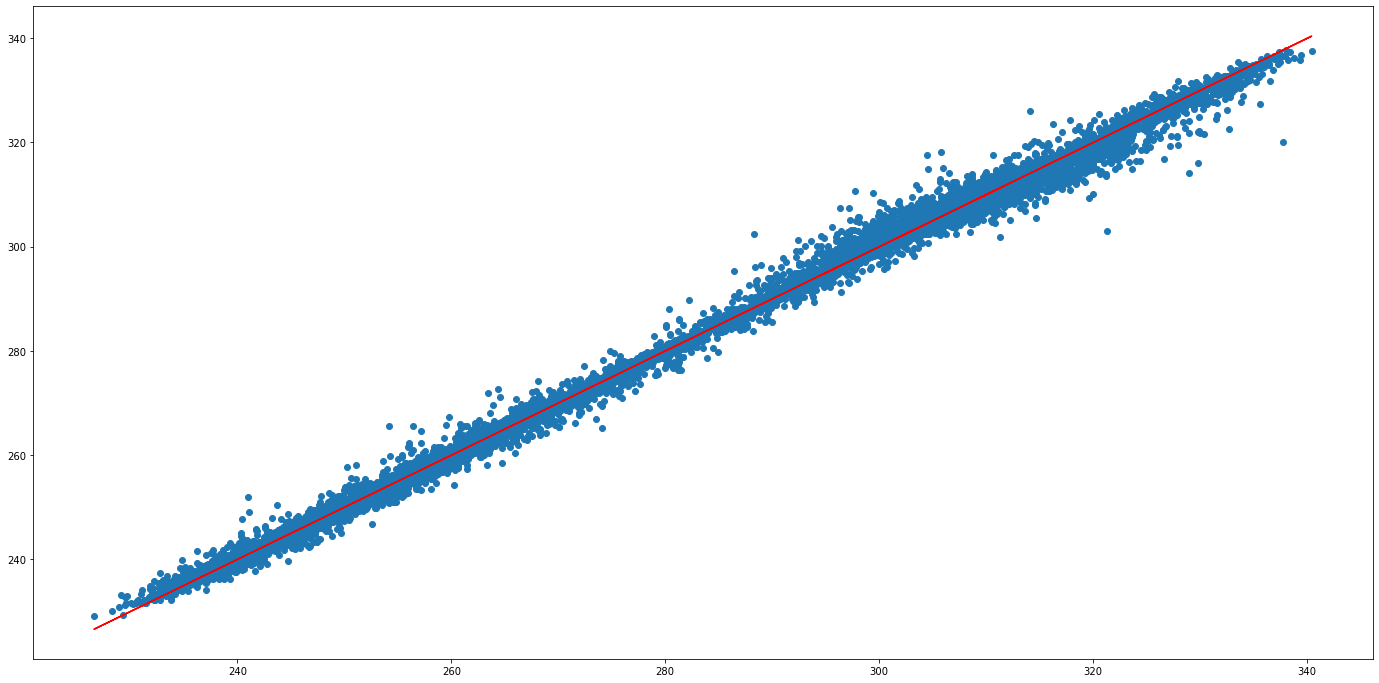

In [100]:
plot_predictions(y_train,y_pred_train)

